<a href="https://colab.research.google.com/github/Hanyan-Wu/MachineLearningLab/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [10]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# 1.) Fit a kmeans Model with any Number of Clusters

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Set number of clusters equal to 5
kmeans = KMeans(n_clusters= 5,
                random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt

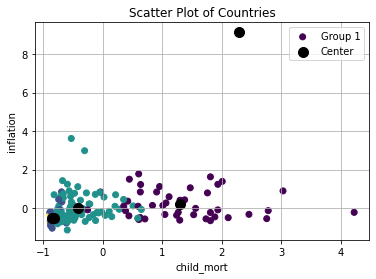

In [19]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0 # child mortality
x2_index = 5 # inflation
## Collapsing all variables, if we visualize another feature, the Blue and Green points could be very far away from eachother

plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Countries')
plt.legend(["Group 1", "Center"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [20]:
WCSSs = []

Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random') # Number of random iteration --> n_init
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

In [ ]:
# # Alternative way of doing the above in one line of code
# WCSSs2 = [KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1,15)]

In [21]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 620.2564324973123,
 571.0702578298518,
 518.3046487082993,
 469.670991271136,
 457.74670523344554,
 403.7127299984563,
 375.5036107534041,
 353.41063151032097,
 340.5666012078258,
 319.77176787350504]

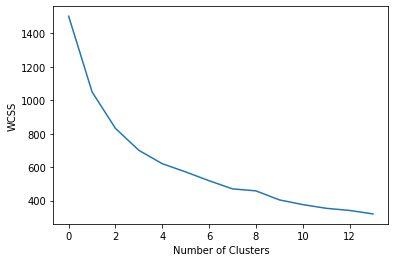

In [22]:
# Plot the values
plt.plot(WCSSs)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Explain the reason for choosing k:

Here I choose k = 3, because I want to check if High-income countries, Middle-income countries and Low-income countries have any distinctions in these socio-economic figures.

Also, from the plot in Q3, the WCSS curve against Number of Clusters displays a relatively smooth descent. So, choosing k = 3 is reasonable.

In [23]:
# Fit the model
k = 3
kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [24]:
# Get the predictions first
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [25]:
preds

,0
0,0
1,2
2,2
3,0
4,2
...,...
162,2
163,2
164,2
165,0


In [27]:
# Concat the clustering results into the dataframe
output = pd.concat([preds, df], axis = 1)

In [28]:
output.head()

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [29]:
# Get the list of countries in cluster 1
list(output[output[0] == 0]['country'])

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [30]:
# Get the list of countries in cluster 2
list(output[output[0] == 1]['country'])

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [31]:
# Get the list of countries in cluster 3
list(output[output[0] == 2]['country'])

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [32]:
output.columns

Index([           0,    'country', 'child_mort',    'exports',     'health',
          'imports',     'income',  'inflation', 'life_expec',  'total_fer',
             'gdpp'],
      dtype='object')

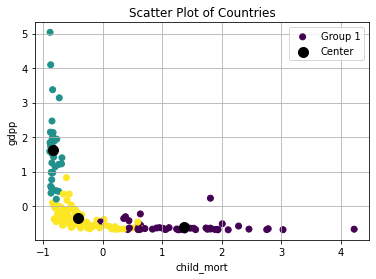

In [35]:
# Plot the child mortality and gdpp
chm_index = 2 # child mortality
gdpp_index = 10 # gdpp

plt.scatter(X_scaled[:, chm_index-2], X_scaled[:, gdpp_index-2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, chm_index-2], kmeans.cluster_centers_[:, gdpp_index-2], marker='o', color='black', s=100)

plt.xlabel(output.columns[chm_index])
plt.ylabel(output.columns[gdpp_index])
plt.title('Scatter Plot of Countries')
plt.legend(["Group 1", "Center"])
plt.grid()
plt.show()

The graph above clearly displays three clusters of countries:

1. Countries with high child mortality rate and low GDP per capita. This is likely the cluster of low-income countries. And, as seen from the list, this cluster contains countries in the middle east, the pacific and Africa.

2. Countries with low child mortality rate and high GDP per capita. This is likely to be the high-income countries cluster. And, as seen from the list, this cluster contains many developed countries, such as Canada, Germany, US, UK, Japan and South Korea.

3. Countries with median child mortality and GDP per capita. These are likely the middle-income countries, the list of which contains many countries of the emerging markets, like India, China, Brazil and Vietnam.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [36]:
Q6DF = pd.concat([preds, df], axis = 1)

In [37]:
Q6DF

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,2,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,2,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,2,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,2,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [38]:
Q6DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


# Q7.) Write an observation about the descriptive statistics.

According to the table above, countries in group 1, with the index 0, have very high child mortality rate, total fertility rate and inflation and comparatively low exports, life expectancy, GDP per capita and income. 

Countries in group 2, with the index 1, are just the opposite. And countries in group 3, with the index 2, are in the middle, regarding these socio-economic figures.

This clustering result is very much in line with the assumption of countries being classified into Low-income, High-income and Middle-income countries.